In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial.distance import squareform
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import seaborn as sns
from collections import Counter

In [139]:
dms_ecoli = pd.read_excel('dms_reactivities.xlsx', sheet_name='ecoli')

dms_yeast = pd.read_excel('dms_reactivities.xlsx', sheet_name='yeast')

dms_hsapien = pd.read_excel('dms_reactivities.xlsx', sheet_name='hsapien')

In [140]:
#ecoli
G_e= dms_ecoli[dms_ecoli['sequence']=='G']
G_e.index= np.arange(0, len(G_e))

U_e= dms_ecoli[dms_ecoli['sequence']=='U']
U_e.index= np.arange(0, len(U_e))

#yeast
G_y= dms_yeast[dms_yeast['sequence']=='G']
G_y.index= np.arange(0, len(G_y))

U_y= dms_yeast[dms_yeast['sequence']=='U']
U_y.index= np.arange(0, len(U_y))


#hsapien
G_h= dms_hsapien[dms_hsapien['sequence']=='G']
G_h.index= np.arange(0, len(G_h))

U_h= dms_hsapien[dms_hsapien['sequence']=='U']
U_h.index= np.arange(0, len(U_h))

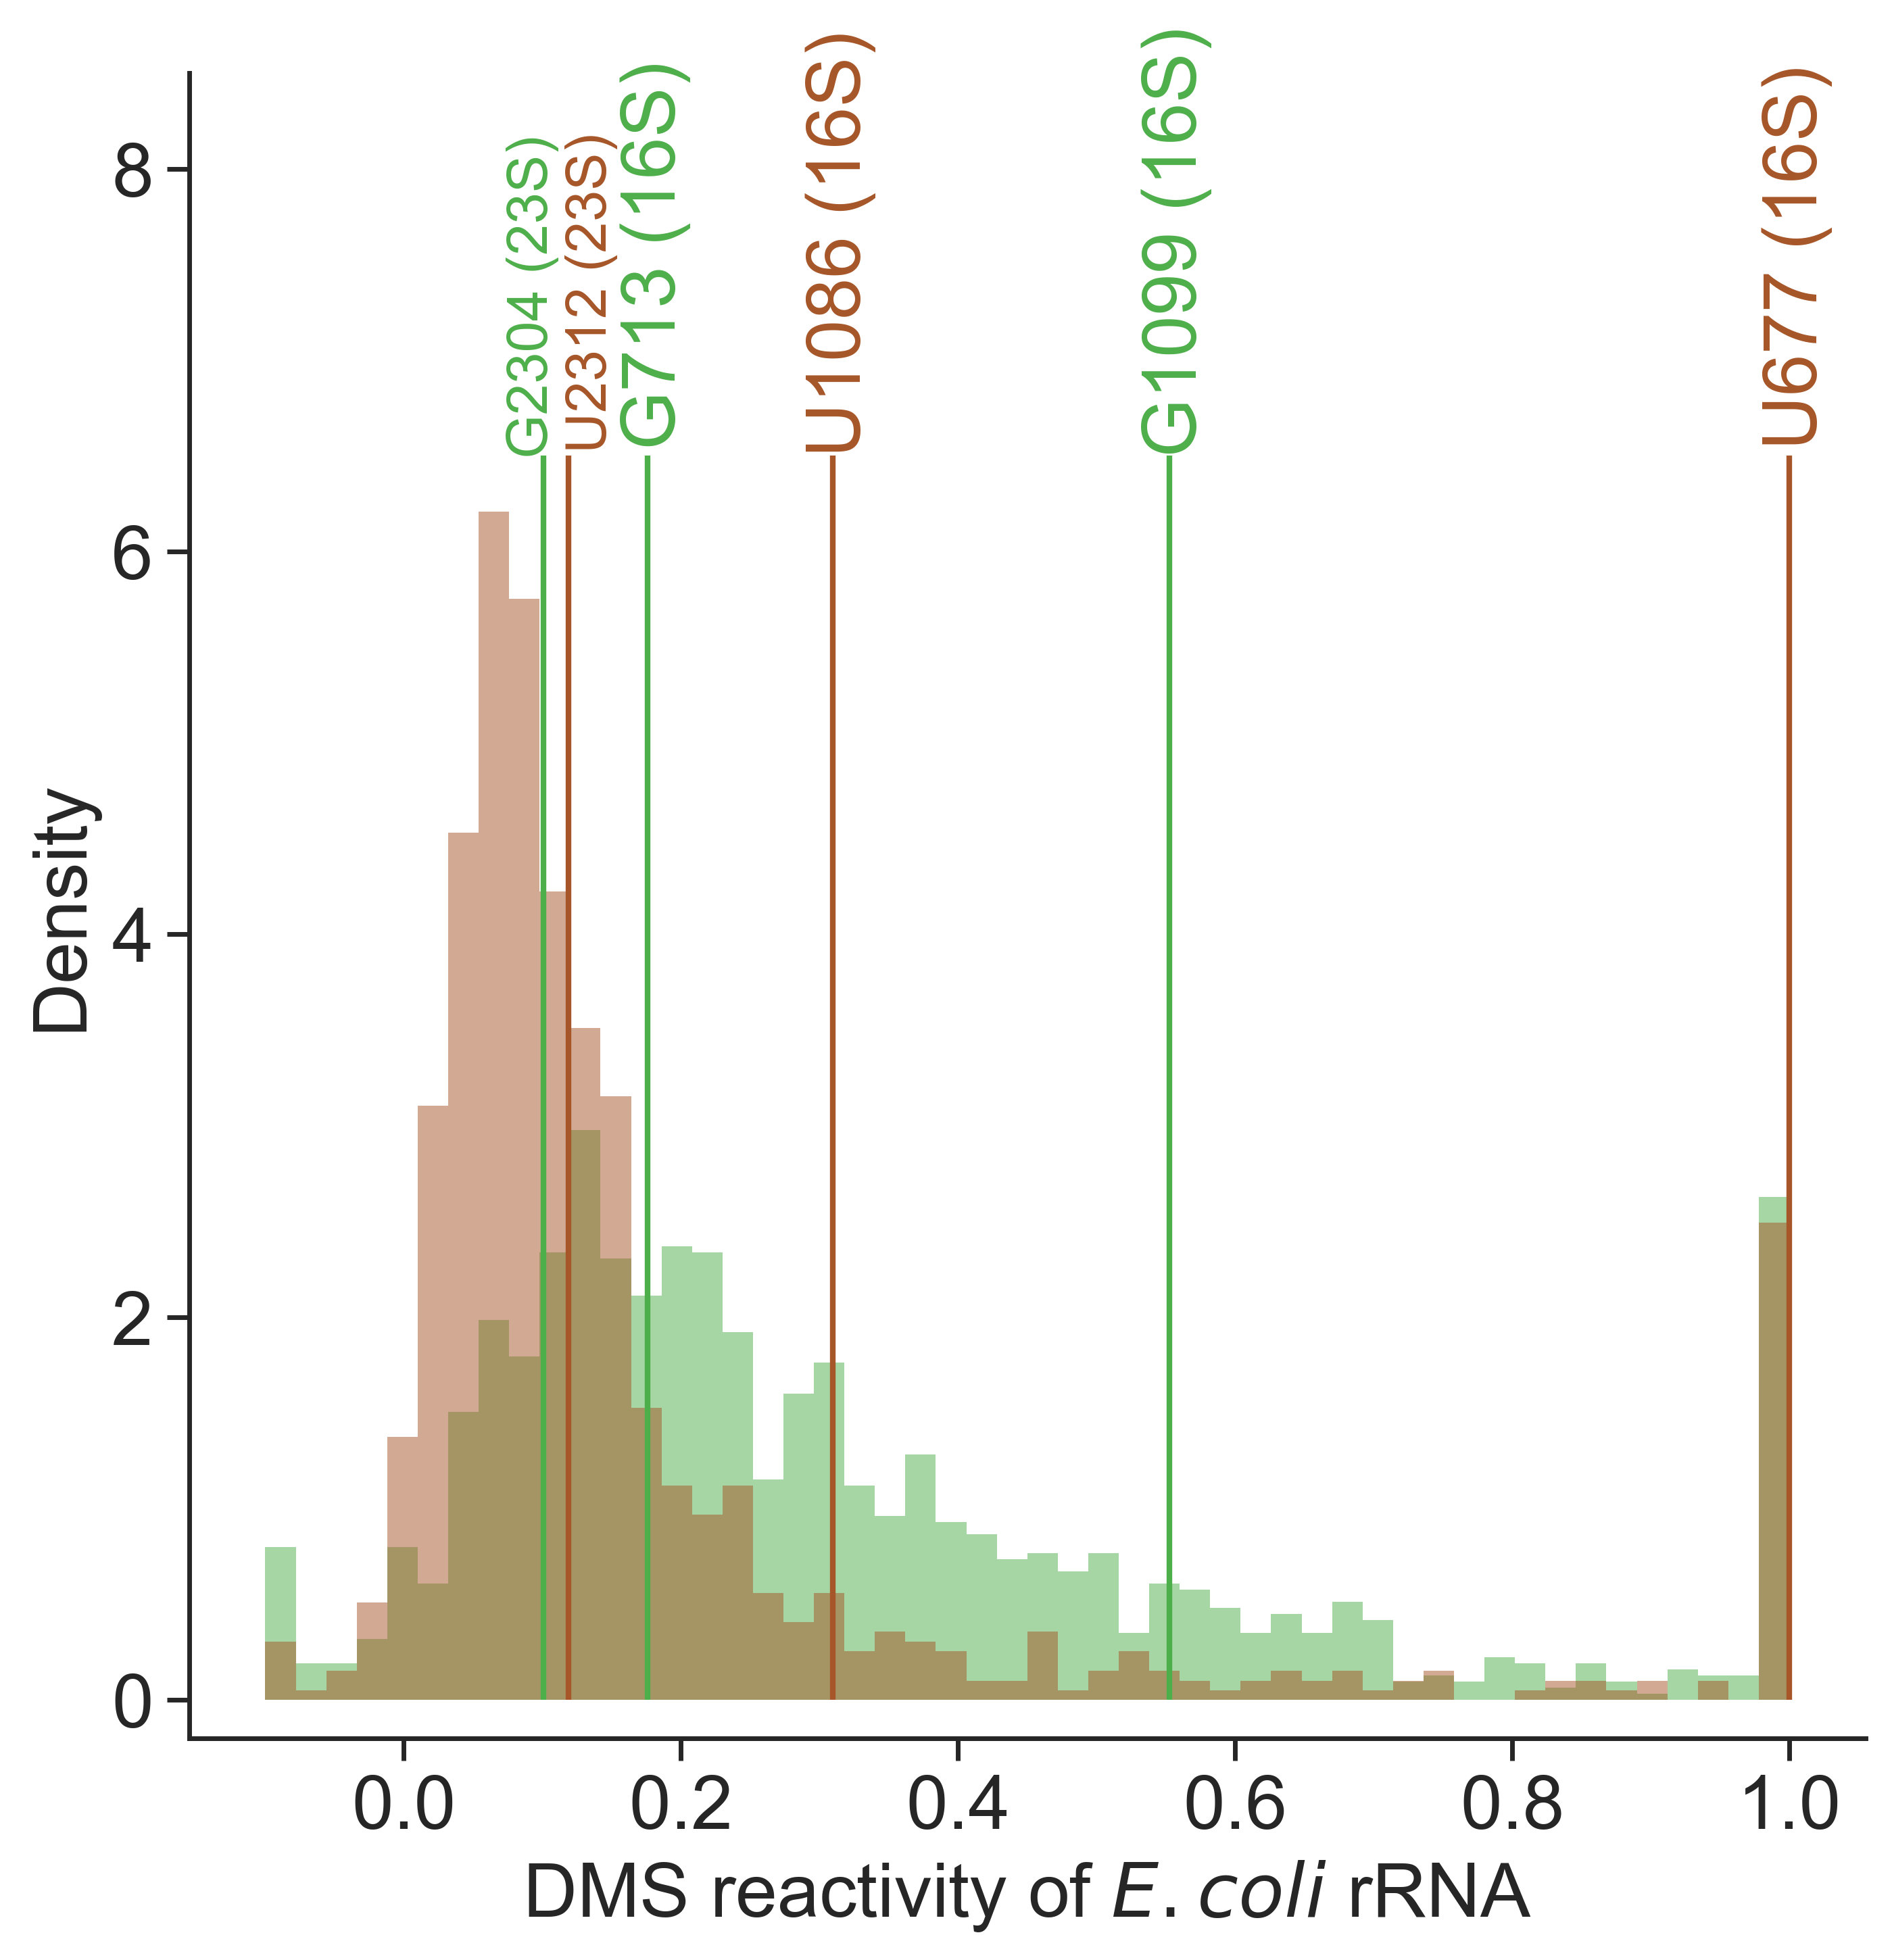

In [250]:
sns.set(style= 'ticks', font= "Arial")
fig, ax = plt.subplots(figsize = (8,8), dpi = 400)

G_e['DMS'].hist(bins=50, color='#4daf4a', edgecolor='None', alpha= 0.5, density= True)
U_e['DMS'].hist(bins=50, color='#a65628', edgecolor='None', alpha= 0.5, density= True)

#legend= plt.legend(loc='upper right', borderpad = 0, handletextpad = 0, prop={'size': 15},labels=['Reactivities of G','Reactivities of U'], frameon=False)

plt.grid(False)

plt.yticks(ticks=[0, 2, 4, 6, 8], fontsize = 15)
plt.ylim(-0.2, 8.5)

plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)

ax= plt.gca()
ax.spines.top.set_visible(False)
ax.spines.right.set_visible(False)

ax.set_xlabel("DMS reactivity of $\mathit{E. coli}$ rRNA", fontsize=20)
ax.set_ylabel("Density", fontsize=20)

#U677 reactivity
U677= U_e[(U_e['RNA']=='16S')&(U_e['ref_index']==677)]
U677_e= U677['DMS'].to_list()[0]
plt.vlines(x= U677_e, ymin=0, ymax=6.5, color='#a65628', linewidth=1.5, linestyle='-')
plt.text(U677_e-0.02, 6.51, ' U677 (16S)', fontsize=20, rotation=90, color='#a65628')

#U1086 reactivity
U1086= U_e[(U_e['RNA']=='16S')&(U_e['ref_index']==1086)]
U1086_e= U1086['DMS'].to_list()[0]
plt.vlines(x= U1086_e, ymin=0, ymax=6.5, color='#a65628', linewidth=1.5, linestyle='-')
plt.text(U1086_e-0.02, 6.58, 'U1086 (16S)', fontsize=20, rotation=90, color='#a65628')

#U2312 reactivity
U2312= U_e[(U_e['RNA']=='23S')&(U_e['ref_index']==2312)]
U2312_e= U2312['DMS'].to_list()[0]
plt.vlines(x= U2312_e, ymin=0, ymax=6.5, color='#a65628', linewidth=1.5, linestyle='-')
plt.text(U2312_e-0.0028, 6.58, 'U2312 (23S)', fontsize=15, rotation=90, color='#a65628')


#G713 reactivity
G713= G_e[(G_e['RNA']=='16S')&(G_e['ref_index']==713)]
G713_e= G713['DMS'].to_list()[0]
plt.vlines(x= G713_e, ymin=0, ymax=6.5, color='#4daf4a', linewidth=1.5, linestyle='-')
plt.text(G713_e-0.02, 6.51, ' G713 (16S)', fontsize=20, rotation=90, color='#4daf4a')

#G1099 reactivity
G1099= G_e[(G_e['RNA']=='16S')&(G_e['ref_index']==1099)]
G1099_e= G1099['DMS'].to_list()[0]
plt.vlines(x= G1099_e, ymin=0, ymax=6.5, color='#4daf4a', linewidth=1.5, linestyle='-')
plt.text(G1099_e-0.02, 6.58, 'G1099 (16S)', fontsize=20, rotation=90, color='#4daf4a')

#G2304 reactivity
G2304= G_e[(G_e['RNA']=='23S')&(G_e['ref_index']==2304)]
G2304_e= G2304['DMS'].to_list()[0]
plt.vlines(x= G2304_e, ymin=0, ymax=6.5, color='#4daf4a', linewidth=1.5, linestyle='-')
plt.text(G2304_e-0.027, 6.55, 'G2304 (23S)', fontsize=15, rotation=90, color='#4daf4a')

plt.savefig('fig_S5A_Ecoli_rRNA_DMS_reactivity.pdf', format="pdf", bbox_inches="tight", dpi = 3000)

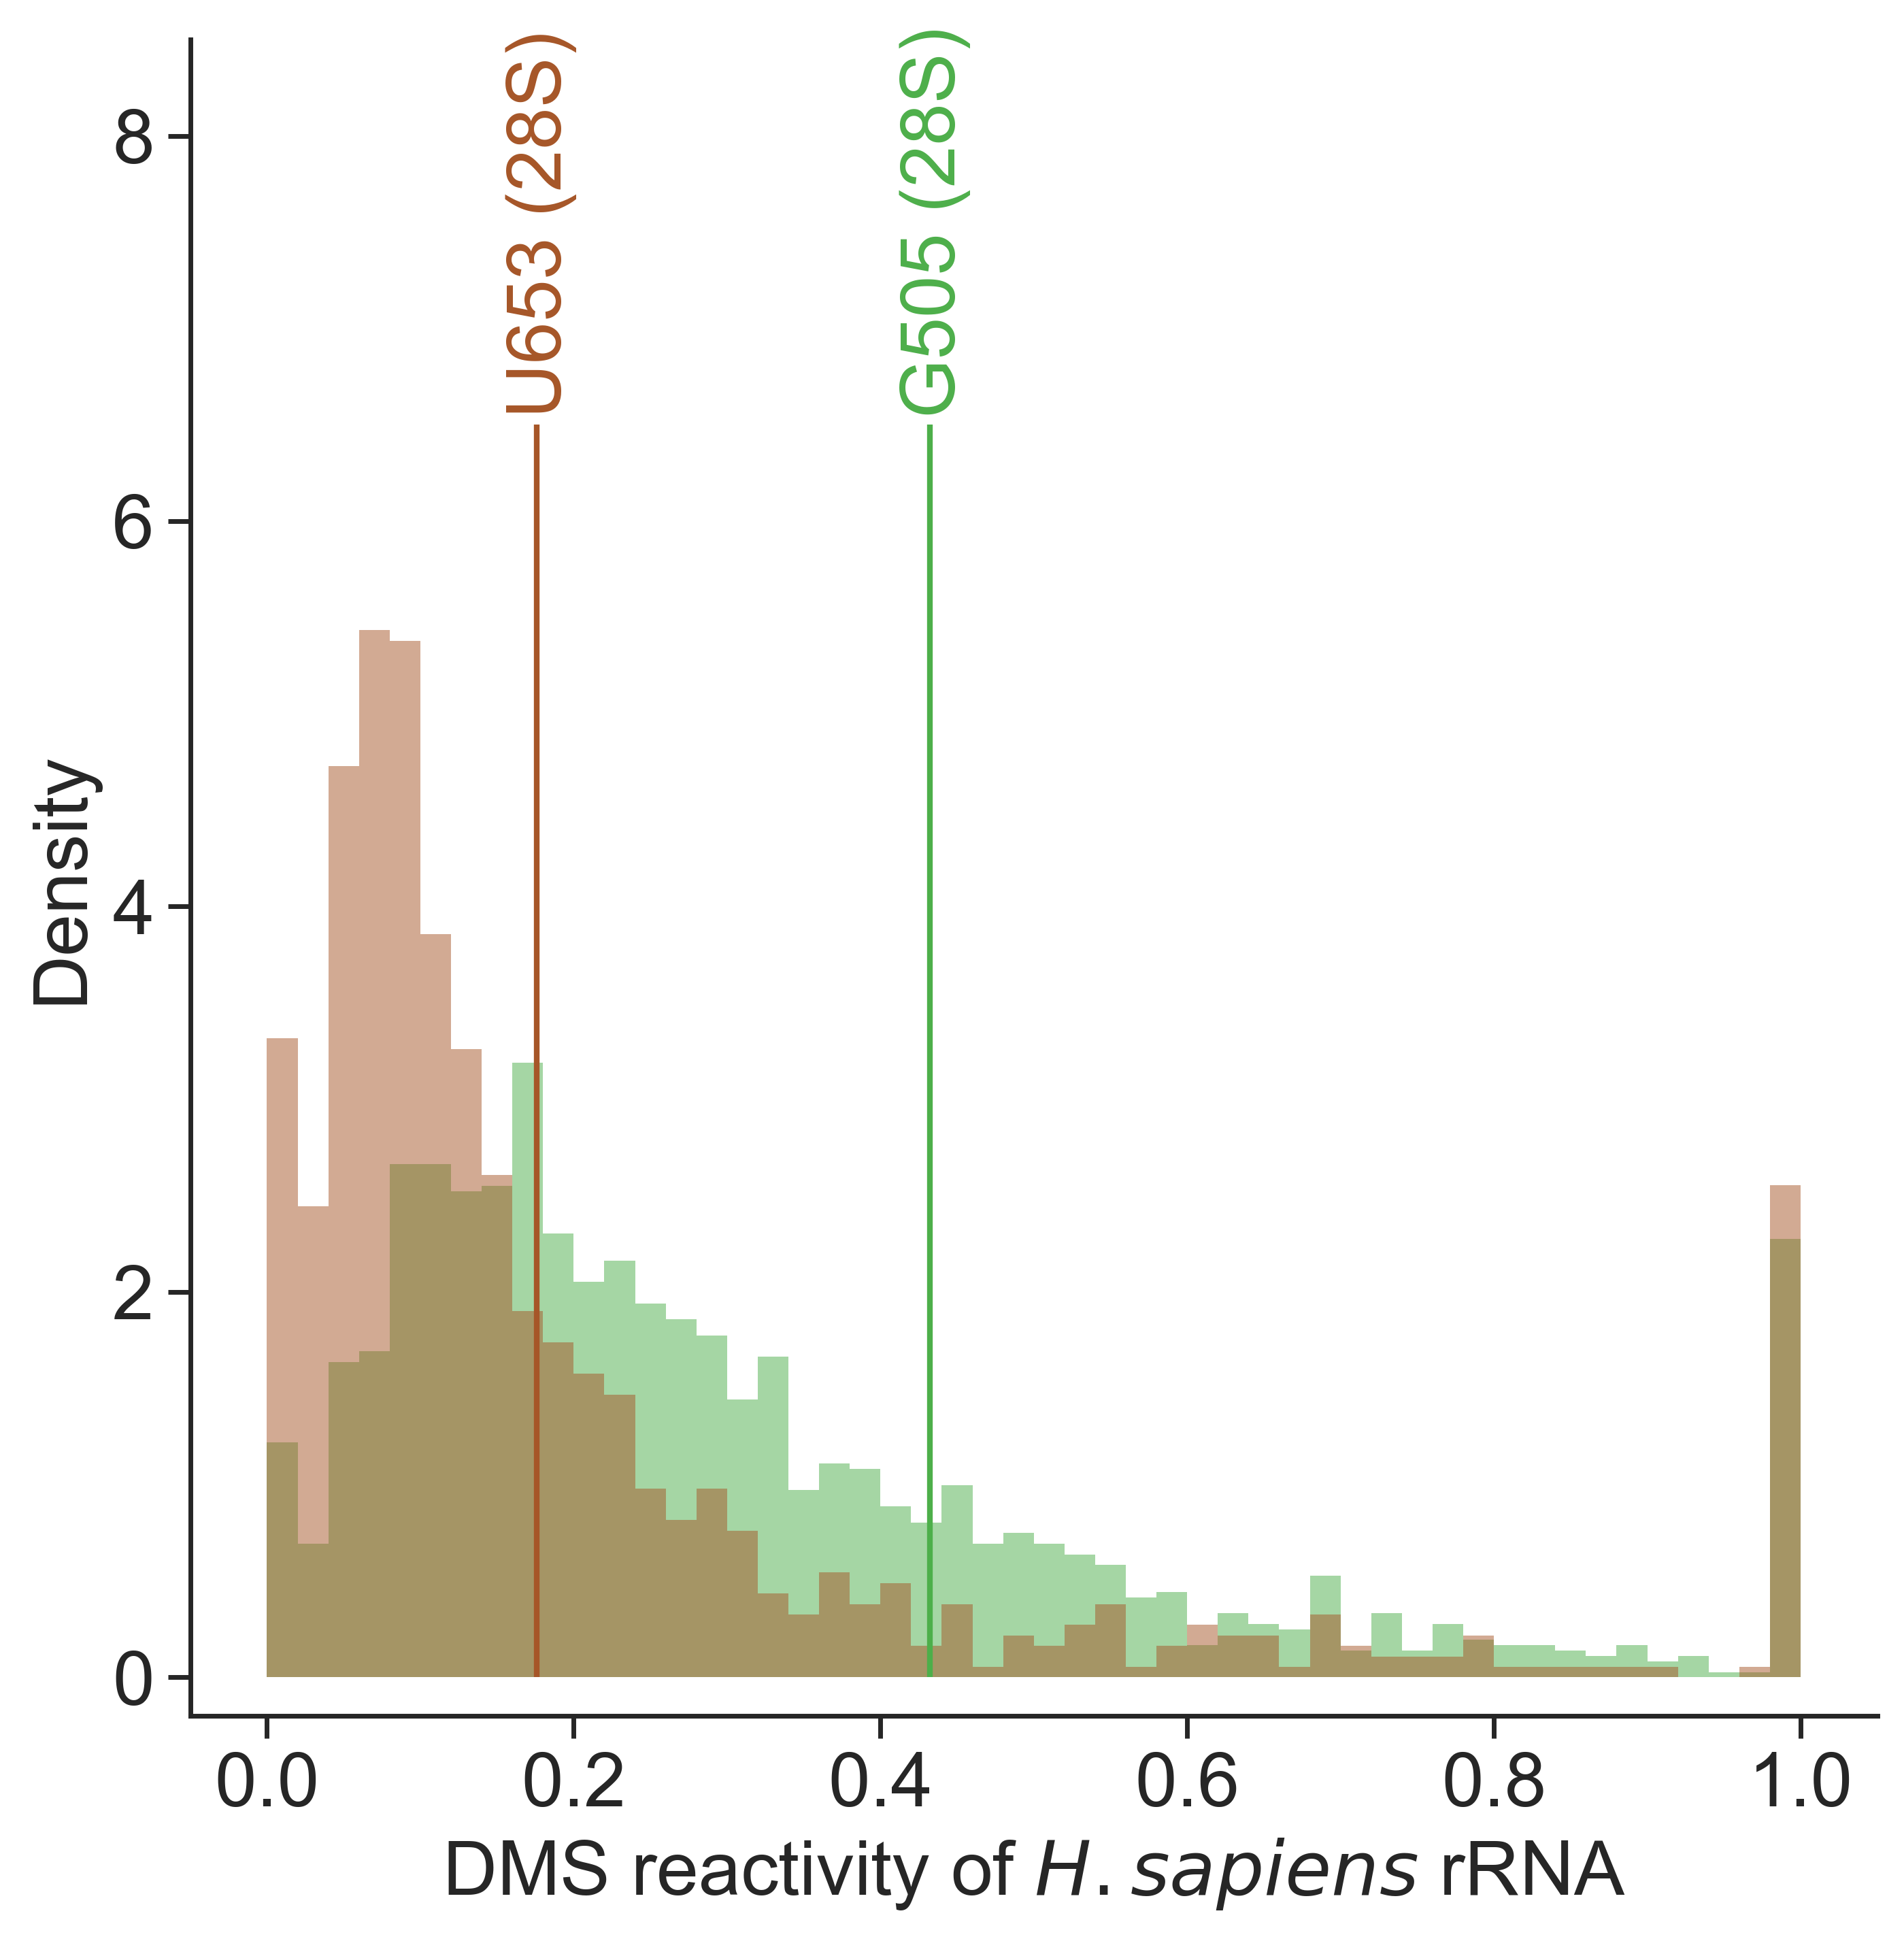

In [251]:
sns.set(style= 'ticks', font= "Arial")
fig, ax = plt.subplots(figsize = (8,8), dpi = 400)

G_h['DMS'].hist(bins=50, color='#4daf4a', edgecolor='None', alpha= 0.5, density= True)
U_h['DMS'].hist(bins=50, color='#a65628', edgecolor='None', alpha= 0.5, density= True)


plt.grid(False)

plt.yticks(ticks=[0, 2, 4, 6, 8], fontsize = 20)
plt.ylim(-0.2, 8.5)

plt.tick_params(axis='x', labelsize=20)

plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)

ax.set_xlabel("DMS reactivity of $\mathit{H. sapiens}$ rRNA", fontsize=20)
ax.set_ylabel("Density", fontsize=20)

ax= plt.gca()
ax.spines.top.set_visible(False)
ax.spines.right.set_visible(False)

#U653 reactivity
U653= U_h[(U_h['RNA']=='28S')&(U_h['ref_index']==653)]
U653_h= U653['DMS'].to_list()[0]
plt.vlines(x= U653_h, ymin=0, ymax=6.5, color='#a65628', linewidth=1.5, linestyle='-')
plt.text(U653_h-0.02, 6.51, ' U653 (28S)', fontsize=20, rotation=90, color='#a65628')

#G505 reactivity
G505= G_h[(G_h['RNA']=='28S')&(G_h['ref_index']==505)]
G505_h= G505['DMS'].to_list()[0]
plt.vlines(x= G505_h, ymin=0, ymax=6.5, color='#4daf4a', linewidth=1.5, linestyle='-')
plt.text(G505_h-0.02, 6.51, ' G505 (28S)', fontsize=20, rotation=90, color='#4daf4a')

plt.savefig('fig_S5B_hsapiens_rRNA_DMS_reactivity.pdf', format="pdf", bbox_inches="tight", dpi = 3000)

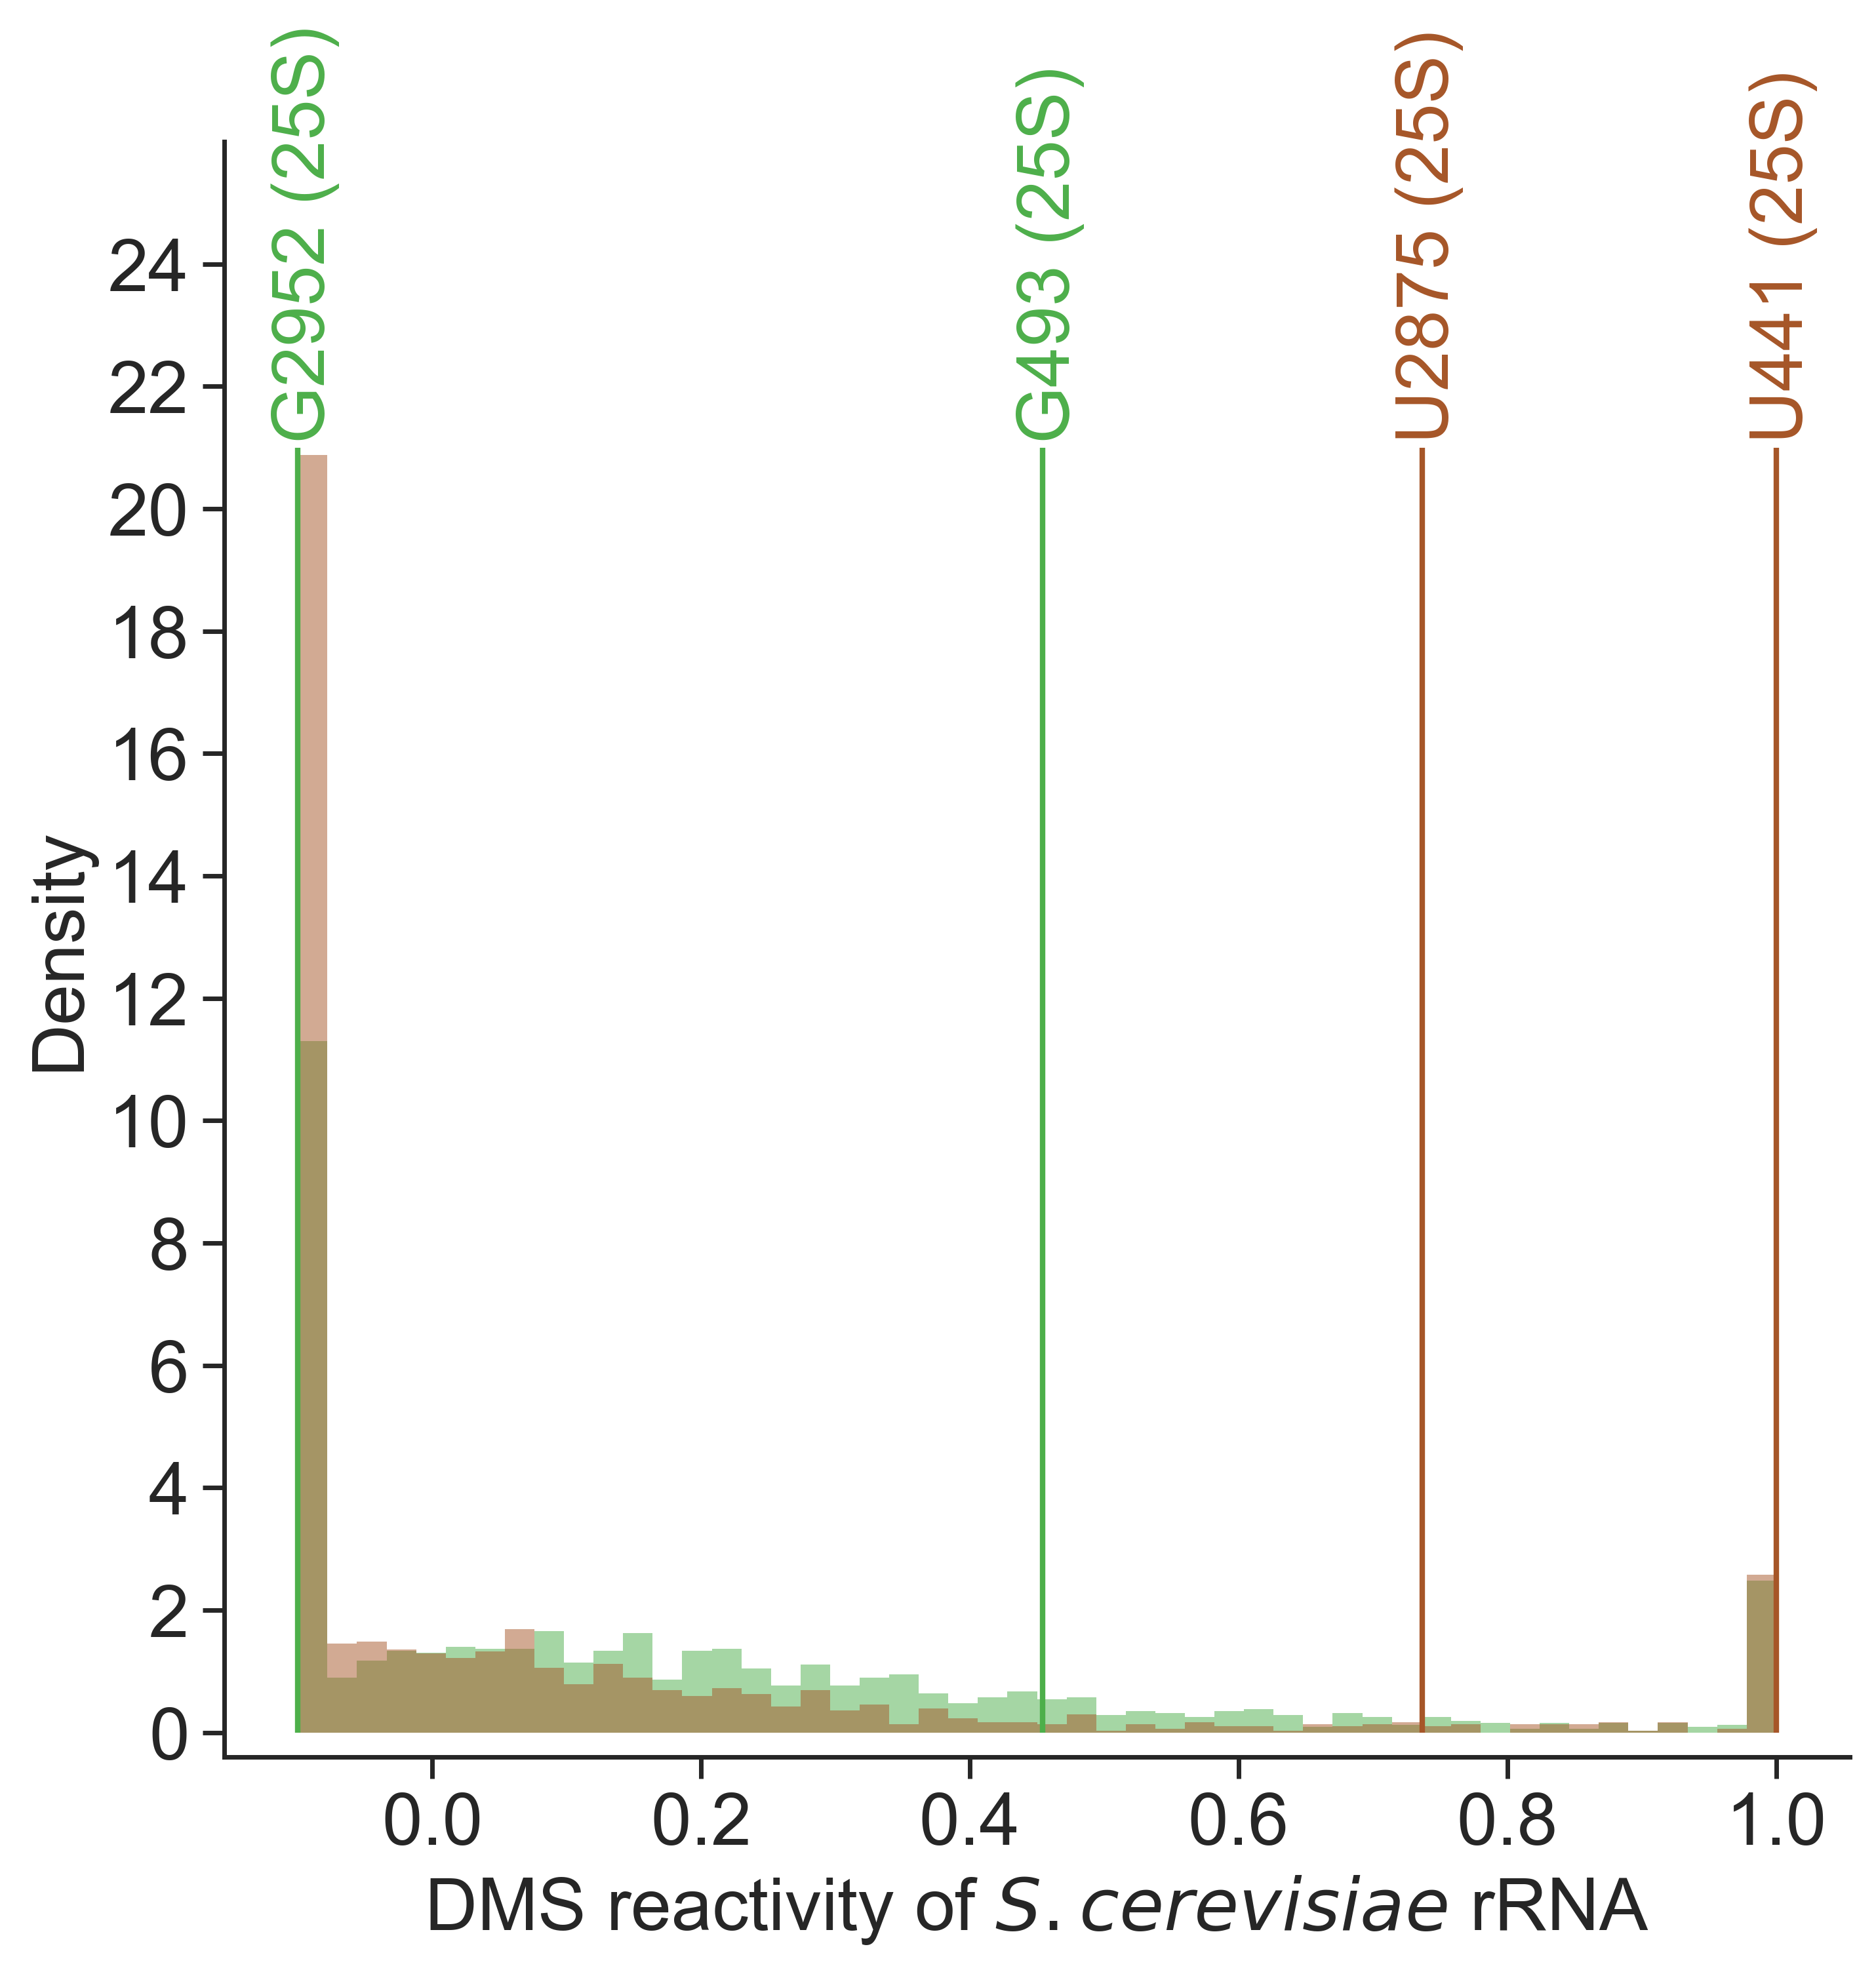

In [252]:
sns.set(style= 'ticks', font= "Arial")
fig, ax = plt.subplots(figsize = (8,8), dpi = 400)

G_y['DMS'].hist(bins=50, color='#4daf4a', edgecolor='None', alpha= 0.5, density= True)
U_y['DMS'].hist(bins=50, color='#a65628', edgecolor='None', alpha= 0.5, density= True)


plt.grid(False)

plt.yticks(ticks=[0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24], fontsize = 20)
plt.ylim(-0.4, 26)

plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)

ax= plt.gca()
ax.spines.top.set_visible(False)
ax.spines.right.set_visible(False)

ax.set_xlabel("DMS reactivity of $\mathit{S. cerevisiae}$ rRNA", fontsize=20)
ax.set_ylabel("Density", fontsize=20)

#U441 reactivity
U441= U_y[(U_y['RNA']=='25S')&(U_y['ref_index']==441)]
U441_y= U441['DMS'].to_list()[0]
plt.vlines(x= U441_y, ymin=0, ymax=21, color='#a65628', linewidth=1.5, linestyle='-')
plt.text(U441_y-0.02, 21, ' U441 (25S)', fontsize=20, rotation=90, color='#a65628')

#U2875 reactivity
U2875= U_y[(U_y['RNA']=='25S')&(U_y['ref_index']==2875)]
U441_y= U2875['DMS'].to_list()[0]
plt.vlines(x= U441_y, ymin=0, ymax= 21, color='#a65628', linewidth=1.5, linestyle='-')
plt.text(U441_y-0.02, 21, ' U2875 (25S)', fontsize=20, rotation=90, color='#a65628')

#G493 reactivity
G493= G_y[(G_y['RNA']=='25S')&(G_y['ref_index']==493)]
G493_y= G493['DMS'].to_list()[0]
plt.vlines(x= G493_y, ymin=0, ymax=21, color='#4daf4a', linewidth=1.5, linestyle='-')
plt.text(G493_y-0.02, 21, ' G493 (25S)', fontsize=20, rotation=90, color='#4daf4a')

#G2952 reactivity
G2952= G_y[(G_y['RNA']=='25S')&(G_y['ref_index']==2952)]
G2952_y= G2952['DMS'].to_list()[0]
plt.vlines(x= G2952_y, ymin=0, ymax=21, color='#4daf4a', linewidth=1.5, linestyle='-')
plt.text(G2952_y-0.02, 21, ' G2952 (25S)', fontsize=20, rotation=90, color='#4daf4a')

plt.savefig('fig_S5C_yeast_rRNA_DMS_reactivity.pdf', format="pdf", bbox_inches="tight", dpi = 3000)